<a href="https://colab.research.google.com/github/Rahna10/Regression/blob/master/video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving tom&jery.mp4 to tom&jery.mp4
Done!


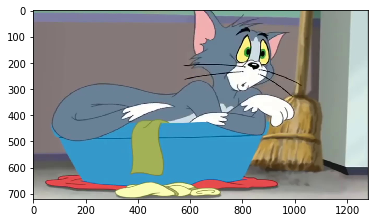

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.utils import np_utils
from skimage.transform import resize
#read file from local disk
from google.colab import files
uploaded = files.upload()

#read video extract the frames and save it as image
count =0
videofile ="tom&jery.mp4"
cap =cv2.VideoCapture(videofile)
frameRate= cap.get(5)
x=1
while(cap.isOpened()):
  frameId =cap.get(1)
  ret,frame =cap.read()
  if(ret!= True):
    break
  if(frameId % math.floor(frameRate)==0):
    filename ="frame%d.jpg" % count
    count+=1
    cv2.imwrite(filename,frame)
cap.release()
print("Done!")


#to view the frame
img = plt.imread('frame2.jpg')
plt.imshow(img)

#for i in range (0,len(filename)):
 #img = plt.imread('frame(i).jpg')
 #plt.imshow(img)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

data =pd.read_csv('mapping.csv')
data.head()

X =[]
for img_name in data.Image_ID:
  img =plt.imread('' + img_name)
  X.append(img)
X =np.array(X)

#training label
y =data.Class
dummy_y =np_utils.to_categorical(y)

#to reshape images into 224*224*3
image =[]
for i in range(0,X.shape[0]):
  a =resize(X[i], preserve_range =True, output_shape =(224,224)).astype(int)
  image.append(a)
X =np.array(image)


In [ ]:
#preprocessing data
from keras.applications.vgg16 import preprocess_input
X =preprocess_input(X, mode='tf')
